In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%%sh
apt-get install openjdk-8-jdk-headless -qq > /dev/null
wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
tar -xvf spark-3.0.0-bin-hadoop3.2.tgz
pip install -q findspark

spark-3.0.0-bin-hadoop3.2/
spark-3.0.0-bin-hadoop3.2/NOTICE
spark-3.0.0-bin-hadoop3.2/kubernetes/
spark-3.0.0-bin-hadoop3.2/kubernetes/tests/
spark-3.0.0-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.0.0-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.0.0-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.0-bin-hadoop3.2/jars/
spark-3.0.0-bin-hadoop3.2/jars/hive-

In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [5]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [6]:
import os

os.chdir("/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation")

In [7]:
!wget https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2022-11-27 00:51:07--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip.1’

ml-25m.zip.1        100%[===================>] 249.84M  67.0MB/s    in 3.8s    

2022-11-27 00:51:11 (65.4 MB/s) - ‘ml-25m.zip.1’ saved [261978986/261978986]



In [ ]:
!unzip ml-25m.zip

Archive:  ml-25m.zip
   creating: ml-25m/
  inflating: ml-25m/tags.csv         
  inflating: ml-25m/links.csv        
  inflating: ml-25m/README.txt       
  inflating: ml-25m/ratings.csv      
  inflating: ml-25m/genome-tags.csv  
  inflating: ml-25m/genome-scores.csv  
  inflating: ml-25m/movies.csv       


In [8]:
#Test installation
df = spark.createDataFrame([{"Google": "Colab","Spark": "Scala"} ,{"Google": "Dataproc","Spark":"Python"}])
df.show()

/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/session.py:378: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+--------+------+
|  Google| Spark|
+--------+------+
|   Colab| Scala|
|Dataproc|Python|
+--------+------+



In [9]:
os.getcwd()

'/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation'

In [10]:
import pyspark.sql.functions

In [11]:
from pyspark import SparkContext
sc =SparkContext.getOrCreate()
from pyspark.sql import SQLContext
sql = SQLContext(sc)

file1 = '/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation/ml-25m/movies.csv'
movies= sql.read.format('com.databricks.spark.csv').options(header= True, inferschema='true', quote='"', delimiter=',', multiLine = 'true', escape='"').load(file1)
movies.show()

file2 = '/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation/ml-25m/ratings.csv'
ratings= sql.read.format('com.databricks.spark.csv').options(header= True, inferschema='true', quote='"', delimiter=',', multiLine = 'true', escape='"').load(file2)
ratings.show()

file3 = '/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation/ml-25m/tags.csv'
tags = sql.read.format('com.databricks.spark.csv').options(header= True, inferschema='true', quote='"', delimiter=',', multiLine = 'true', escape='"').load(file3)
tags.show()

file4 = '/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation/ml-25m/links.csv'
links = sql.read.format('com.databricks.spark.csv').options(header= True, inferschema='true', quote='"', delimiter=',', multiLine = 'true', escape='"').load(file4)
links.show()

file5 = '/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation/ml-25m/genome-tags.csv'
gnometags = sql.read.format('com.databricks.spark.csv').options(header= True, inferschema='true', quote='"', delimiter=',', multiLine = 'true', escape='"').load(file5)
gnometags.show()

file6 = '/content/drive/Shareddrives/IDS561/FinalProject/Movie Recomendation/ml-25m/genome-scores.csv'
gnomeScores = sql.read.format('com.databricks.spark.csv').options(header= True, inferschema='true', quote='"', delimiter=',', multiLine = 'true', escape='"').load(file6)
gnomeScores.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [11]:
movies.show(5), ratings.show(5), tags.show(5), links.show(5), gnomeScores.show(5), gnometags.show(5)

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    296|   5.0|1147880044|
|     1|    306|   3.5|1147868817|
|     1|    307|   5.0|1147868828|
|     1|    665|   5.0|1147878820|
|     1|    899|   3.5|1147868510|
+------+-------+------+----------+
only showing top 5 rows

+------+-------+----------------+----------+
|userId|movieId|             tag| timestamp|
+------+-------+----------------+----------+
|     3|    260|         classic

(None, None, None, None, None, None)

In [15]:
ratings.createOrReplaceTempView("ratings")
movies.createOrReplaceTempView("movies")
query = """SELECT ratings.movieId, 
                userId, rating, title
                FROM ratings left join movies on ratings.movieId=movies.movieId"""
movies_ratings = spark.sql(query)
movies_ratings=movies_ratings.filter("title is not null")
movies_ratings.show()

+-------+------+------+--------------------+
|movieId|userId|rating|               title|
+-------+------+------+--------------------+
|    296|     1|   5.0| Pulp Fiction (1994)|
|    306|     1|   3.5|Three Colors: Red...|
|    307|     1|   5.0|Three Colors: Blu...|
|    665|     1|   5.0|  Underground (1995)|
|    899|     1|   3.5|Singin' in the Ra...|
|   1088|     1|   4.0|Dirty Dancing (1987)|
|   1175|     1|   3.5| Delicatessen (1991)|
|   1217|     1|   3.5|          Ran (1985)|
|   1237|     1|   5.0|Seventh Seal, The...|
|   1250|     1|   4.0|Bridge on the Riv...|
|   1260|     1|   3.5|            M (1931)|
|   1653|     1|   4.0|      Gattaca (1997)|
|   2011|     1|   2.5|Back to the Futur...|
|   2012|     1|   2.5|Back to the Futur...|
|   2068|     1|   2.5|Fanny and Alexand...|
|   2161|     1|   3.5|NeverEnding Story...|
|   2351|     1|   4.5|Nights of Cabiria...|
|   2573|     1|   4.0|        Tango (1998)|
|   2632|     1|   5.0|Saragossa Manuscr...|
|   2692| 

In [16]:
movie_freq=movies_ratings.groupBy("movieId").count() 
most_viewed_indices = movie_freq.filter("count>= 100").select('movieId')
most_viewed_indices.createOrReplaceTempView("most_viewed")
movies_ratings.createOrReplaceTempView("movies_ratings")
query = """SELECT distinct movieId
                    , title
                    , avg(rating) as average 
                    from movies_ratings 
                    where title is not null and 
                    movieId in (select distinct movieId 
                                  from most_viewed limit 100) 
                    group by movieId, title order by average desc"""
highestrated_pop = spark.sql(query)
highestrated_pop.show()

+-------+--------------------+------------------+
|movieId|               title|           average|
+-------+--------------------+------------------+
|    858|Godfather, The (1...| 4.324336165187245|
|  48780|Prestige, The (2006)| 4.093231050865188|
|  26699|Close-Up (Nema-ye...| 4.082417582417582|
|  32460|Knockin' on Heave...| 4.052303860523039|
|  96488|Searching for Sug...|3.9735049205147615|
|   8638|Before Sunset (2004)|3.9717508278145695|
|   1238|   Local Hero (1983)|3.9487092391304346|
|   3475|Place in the Sun,...|3.9108072916666665|
|   4190| Elmer Gantry (1960)| 3.893738140417457|
|   1084|Bonnie and Clyde ...|3.8728776900616415|
|   6773|Triplets of Belle...| 3.833868808567604|
|   7833|Shadow of the Thi...| 3.806451612903226|
|   6620|American Splendor...|3.7897800776196635|
|  26425| In-Laws, The (1979)|3.7789017341040463|
|  69481|Hurt Locker, The ...|3.7274175756832943|
|  31528|   Beau Geste (1939)|3.6882352941176473|
|   2580|           Go (1999)| 3.680228941147194|


In [17]:
gnomeScores.show(), gnometags.show()

+-------+-----+--------------------+
|movieId|tagId|           relevance|
+-------+-----+--------------------+
|      1|    1|0.028749999999999998|
|      1|    2|0.023749999999999993|
|      1|    3|              0.0625|
|      1|    4| 0.07574999999999998|
|      1|    5|             0.14075|
|      1|    6|             0.14675|
|      1|    7|              0.0635|
|      1|    8|             0.20375|
|      1|    9|               0.202|
|      1|   10|             0.03075|
|      1|   11|             0.58025|
|      1|   12| 0.10249999999999998|
|      1|   13| 0.20174999999999998|
|      1|   14|0.007000000000000006|
|      1|   15|0.024500000000000022|
|      1|   16| 0.17275000000000001|
|      1|   17|0.016500000000000015|
|      1|   18| 0.10399999999999998|
|      1|   19|              0.6625|
|      1|   20| 0.30074999999999996|
+-------+-----+--------------------+
only showing top 20 rows

+-----+---------------+
|tagId|            tag|
+-----+---------------+
|    1|       

(None, None)

In [23]:
temp.show()

+-----+-------+--------------------+---------------+
|tagId|movieId|           relevance|            tag|
+-----+-------+--------------------+---------------+
|    1|      1|0.028749999999999998|            007|
|    2|      1|0.023749999999999993|   007 (series)|
|    3|      1|              0.0625|   18th century|
|    4|      1| 0.07574999999999998|          1920s|
|    5|      1|             0.14075|          1930s|
|    6|      1|             0.14675|          1950s|
|    7|      1|              0.0635|          1960s|
|    8|      1|             0.20375|          1970s|
|    9|      1|               0.202|          1980s|
|   10|      1|             0.03075|   19th century|
|   11|      1|             0.58025|             3d|
|   12|      1| 0.10249999999999998|           70mm|
|   13|      1| 0.20174999999999998|            80s|
|   14|      1|0.007000000000000006|           9/11|
|   15|      1|0.024500000000000022|        aardman|
|   16|      1| 0.17275000000000001|aardman st

In [25]:
#Extracting and preparing tag tables bookid,tags and tag count as we plan to use tags with highest counts
temp=gnomeScores.join(gnometags, ["tagId"], "left")
temp.show()
temp.createOrReplaceTempView("temp")
highestrated_pop.createOrReplaceTempView("highrated")
highestrated_pop.show()
# query = """select distinct movieId,  
#                           tag_name 
#                           from (select distinct movieId, 
#                                                 tag, 
#                                                 from temp 
#                                                 where movieId in (select distinct movieId from highrated)) 
#                           A left join movies on A.movieId =movies.movieId """
# moviedetails_tags=spark.sql(query)
# moviedetails_tags.show()

+-----+-------+--------------------+---------------+
|tagId|movieId|           relevance|            tag|
+-----+-------+--------------------+---------------+
|    1|      1|0.028749999999999998|            007|
|    2|      1|0.023749999999999993|   007 (series)|
|    3|      1|              0.0625|   18th century|
|    4|      1| 0.07574999999999998|          1920s|
|    5|      1|             0.14075|          1930s|
|    6|      1|             0.14675|          1950s|
|    7|      1|              0.0635|          1960s|
|    8|      1|             0.20375|          1970s|
|    9|      1|               0.202|          1980s|
|   10|      1|             0.03075|   19th century|
|   11|      1|             0.58025|             3d|
|   12|      1| 0.10249999999999998|           70mm|
|   13|      1| 0.20174999999999998|            80s|
|   14|      1|0.007000000000000006|           9/11|
|   15|      1|0.024500000000000022|        aardman|
|   16|      1| 0.17275000000000001|aardman st

In [ ]:
# temp_df=spark.createDataFrame(temp)
attributes=temp.crosstab('movieId','tag')
#shape(attributes)
# attributes.show()

In [ ]:
#Jaccard
import numpy as np
import pandas as pd
similarity_list1=[]
col=['movieId']
for i in range(10): #10000
  similarity_list2=[]
  a=attributes.collect()[i]
  rdd1=spark.sparkContext.parallelize(a)
  t1=rdd1.collect()
  x=len(t1)
  bid =t1[0]
  l1=t1[1:x]
  #print(l1)
  similarity_list2.append((bid))
  col.append(bid)
  for j in range(10):    #10000 
      b=attributes.collect()[j]
      rdd2=spark.sparkContext.parallelize(b)
      t2=rdd2.collect()
      l2=t2[1:x]
      intersection=np.logical_and(l1,l2)
     # print(intersection)
      union=np.logical_or(l1, l2)
      similarity=(intersection.sum())/(union.sum())
      similarity = float(similarity)  
     # print(similarity)
      similarity_list2.append(similarity)
  similarity_list1.append(similarity_list2)
  

In [ ]:
rdd=sc.parallelize(similarity_list1)
d = spark.createDataFrame(rdd,schema=col)
d.show()
d.createOrReplaceTempView("d")
books10k_2.createOrReplaceTempView("desc")
q="select d.*,desc.title from d left join desc on d.enc_id=desc.enc_id"
final=spark.sql(q)
final.show()

In [ ]:
def recommendations(n,b):
  filt="title=='"+b+"'"
  filt2="title!='"+b+"'"
  d1= final.filter(filt)

  r=""
  h=len(d1.columns)-1
  for i in range(1,h):
    #print(i)
  
    r=r+"'"+str(d1.columns[i])+"',"+d1.columns[i]+","
    #print(r)
  u=len(r)-1

  t=r[0:u]
  t
  f="stack("+str(i)+","+t+") as (T,S)"
  f
  fin=d1.selectExpr('enc_id',f)
  fin.createOrReplaceTempView("output")
  q="select S as rating,title from output left join desc on output.T=desc.enc_id"
  final_out=spark.sql(q).filter(filt2)
  final_out.sort("rating", ascending = False).show(n=n)
recommendations(5,"Blink")

In [21]:
masterDf = ratings.join(tags,
                        on=['movieId','userId'],
                        how='left')\
                  .join(movies,
                        on='movieId',
                        how='left')\
                  .join(gnometags,
                        on='tag',
                        how='left')\
                  .join(gnomeScores,
                        on=['movieId','tagId'],
                        how='left')
masterDf.show()

+-------+-----+-------------+------+------+----------+----------+--------------------+--------------------+------------------+
|movieId|tagId|          tag|userId|rating| timestamp| timestamp|               title|              genres|         relevance|
+-------+-----+-------------+------+------+----------+----------+--------------------+--------------------+------------------+
|     15| 1044|treasure hunt| 56238|   3.0|1400315365|1400315441|Cutthroat Island ...|Action|Adventure|...|0.9977499999999999|
|     31| 1010|      teacher| 58729|   4.5|1431716320|1431716097|Dangerous Minds (...|               Drama|0.9504999999999999|
|     31| 1010|      teacher| 15204|   3.5|1559687711|1559678256|Dangerous Minds (...|               Drama|0.9504999999999999|
|     31| 1010|      teacher| 21096|   4.0|1049903583|1381642930|Dangerous Minds (...|               Drama|0.9504999999999999|
|     31| 1010|      teacher| 15560|   2.0|1496889873|1496889908|Dangerous Minds (...|               Drama|0.95

In [14]:
masterDf.createOrReplaceTempView("masterDf")
spark.sql("SELECT COUNT(DISTINCT movieId) from masterDf").show()

+-----------------------+
|count(DISTINCT movieId)|
+-----------------------+
|                  59047|
+-----------------------+



In [15]:
import pyspark.sql.functions as funcs
import pyspark.sql.types as types

In [16]:
masterDf.select('genres').take(5)

[Row(genres='Action|Adventure|Romance'),
 Row(genres='Drama'),
 Row(genres='Drama'),
 Row(genres='Drama'),
 Row(genres='Drama')]

In [17]:
def splitGenres(inputStr,delim):
  arr = inputStr.split(delim)
  return arr

splitUDF = funcs.udf(lambda x: splitGenres(x,'|'),types.StringType())

In [18]:
masterDf.count()

25624101

In [19]:
genresCount = masterDf.select('movieID',splitUDF(funcs.col('genres')).alias('Genres_Array')).distinct()
genresCount.count()

59047

In [20]:
genresCount = masterDf.select('movieID','genres').distinct()
# genresCount.count()

In [21]:
genresCount.show(5)

+-------+--------------------+
|movieID|              genres|
+-------+--------------------+
|    216|              Comedy|
|   1645|Drama|Mystery|Thr...|
|   1446|        Comedy|Drama|
|   3386|Drama|Mystery|Thr...|
|  93037|      Comedy|Romance|
+-------+--------------------+
only showing top 5 rows



In [22]:
movies = genresCount.toPandas()

In [23]:
import pandas as pd

In [24]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 24465],
 ['Comedy', 16051],
 ['Thriller', 8330],
 ['Romance', 7305],
 ['Action', 6913]]

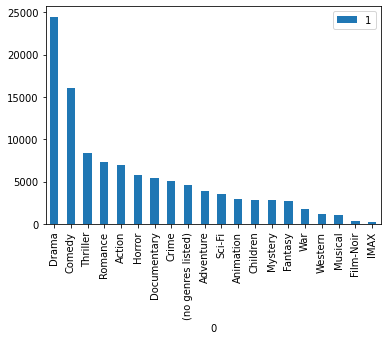

In [26]:
pd.DataFrame(keyword_occurences).plot(x=0,kind='bar')

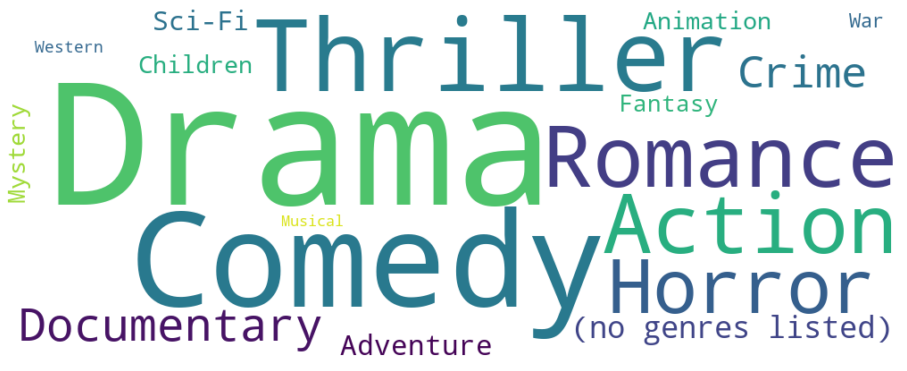

In [43]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(59047, 191)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

In [ ]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [36]:
documents = masterDf.select('genres')

In [38]:
from pyspark.mllib.feature import HashingTF, IDF
from pyspark.ml.feature import Tokenizer, CountVectorizer


# tokenize
tokenizer = Tokenizer().setInputCol("genres").setOutputCol("words")
wordsData = tokenizer.transform(documents)

# vectorize
vectorizer = CountVectorizer(inputCol='words', outputCol='vectorizer').fit(wordsData)
wordsData = vectorizer.transform(wordsData)

hashingTF = HashingTF()
tf = hashingTF.transform(wordsData)
tf.cache()
idf = IDF().fit(tf)
tfidf = idf.transform(tf)


TypeError: ignored

In [41]:
wordsData.take(5)

[Row(genres='Action|Adventure|Romance', words=['action|adventure|romance'], vectorizer=SparseVector(1623, {361: 1.0})),
 Row(genres='Drama', words=['drama'], vectorizer=SparseVector(1623, {0: 1.0})),
 Row(genres='Drama', words=['drama'], vectorizer=SparseVector(1623, {0: 1.0})),
 Row(genres='Drama', words=['drama'], vectorizer=SparseVector(1623, {0: 1.0})),
 Row(genres='Drama', words=['drama'], vectorizer=SparseVector(1623, {0: 1.0}))]